In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("extracted_data.csv")

In [3]:
df.head()

,taxi_group_name,driver_full_name,disabled,deleted,vehicle_brand,experience_group,awards,endurance_score,profitability_score,safety_adherence_score,efficiency_score,no_of_1_star_rating,no_of_2_star_rating,no_of_3_star_rating,no_of_4_star_rating,no_of_5_star_rating
0,"Walsh, Hammond and Craig",Bruce Marshall,0,1,7,6,0,0.666398,-0.252875,0.279009,1.892210,9,38,40,20,22
1,"Walsh, Hammond and Craig",Carol Holmes,0,0,9,4,0,-1.177850,-1.560460,-1.211520,-0.510155,8,16,28,43,39
2,"Walsh, Hammond and Craig",Jay Bailey,0,0,16,6,0,-0.557925,0.083300,0.596134,0.257793,5,12,25,39,26
3,"Walsh, Hammond and Craig",Aimee Smith,0,1,3,4,0,-0.787186,-0.484124,0.966867,0.548890,8,8,16,52,34
4,"Walsh, Hammond and Craig",Hayley Hall,0,0,14,1,0,0.518161,-0.108167,-0.025077,-0.133834,22,32,53,16,13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44061 entries, 0 to 44060
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   taxi_group_name         44061 non-null  object 
 1   driver_full_name        44061 non-null  object 
 2   disabled                44061 non-null  int64  
 3   deleted                 44061 non-null  int64  
 4   vehicle_brand           44061 non-null  int64  
 5   experience_group        44061 non-null  int64  
 6   awards                  44061 non-null  int64  
 7   endurance_score         44061 non-null  float64
 8   profitability_score     44061 non-null  float64
 9   safety_adherence_score  44061 non-null  float64
 10  efficiency_score        44061 non-null  float64
 11  no_of_1_star_rating     44061 non-null  int64  
 12  no_of_2_star_rating     44061 non-null  int64  
 13  no_of_3_star_rating     44061 non-null  int64  
 14  no_of_4_star_rating     44061 non-null

In [5]:
df.describe()

,disabled,deleted,vehicle_brand,experience_group,awards,endurance_score,profitability_score,safety_adherence_score,efficiency_score,no_of_1_star_rating,no_of_2_star_rating,no_of_3_star_rating,no_of_4_star_rating,no_of_5_star_rating
count,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000
mean,0.024943,0.048456,9.497628,3.335285,0.083271,0.004851,0.003015,0.000761,0.003057,10.465060,20.905177,31.664442,31.701754,31.617417
std,0.155952,0.214729,5.556173,1.653068,0.276294,1.002364,0.999180,1.001139,0.998935,6.691607,11.898157,17.204885,17.343350,16.913903
min,0.000000,0.000000,0.000000,1.000000,0.000000,-2.756230,-2.380450,-2.309580,-2.278030,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
25%,0.000000,0.000000,5.000000,2.000000,0.000000,-0.689989,-0.731689,-0.719151,-0.762752,5.000000,11.000000,18.000000,17.000000,18.000000
50%,0.000000,0.000000,10.000000,3.000000,0.000000,-0.109438,-0.091019,-0.154550,-0.075870,10.000000,20.000000,32.000000,30.000000,30.000000
75%,0.000000,0.000000,14.000000,5.000000,0.000000,0.487389,0.603105,0.536859,0.750876,15.000000,30.000000,45.000000,46.000000,45.000000
max,1.000000,1.000000,17.000000,6.000000,1.000000,7.380010,3.521340,5.109370,3.948140,34.000000,56.000000,78.000000,77.000000,81.000000


   taxi_group_name  num_drivers
0       Thomas Ltd         2746
1       Morris Ltd          545
2        Smith PLC          418
3      Griffin Ltd          291
4     Williams Inc          250
5        Price PLC          249
6       Slater Ltd          241
7      Roberts LLC          222
8  Murphy and Sons          222
9    Bell and Sons          209


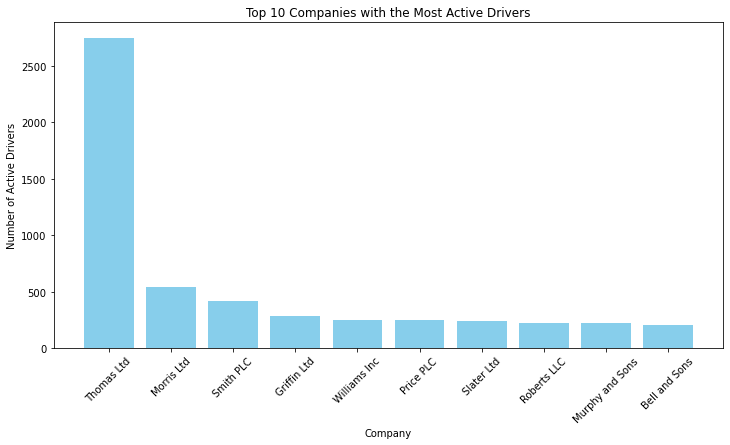

In [44]:
"""
Number of employees in each company
Get the top 10 company that has most drivers
"""
num_employees = df.groupby("taxi_group_name").agg(num_drivers=('driver_full_name', 'count')).reset_index()
num_employees_sorted = num_employees.sort_values("num_drivers", ascending=False)
sorted_df = num_employees_sorted.reset_index().drop(columns='index').head(10)
print(sorted_df)
plt.figure(figsize=(12, 6))

# Bar plot for the top 10 companies
plt.bar(num_employees_sorted['taxi_group_name'].head(10), num_employees_sorted['num_drivers'].head(10), color='skyblue')
plt.xlabel('Company')
plt.ylabel('Number of Active Drivers')
plt.title('Top 10 Companies with the Most Active Drivers')
plt.xticks(rotation=45)
plt.show()

   taxi_group_name  num_drivers
0       Thomas Ltd         2533
1       Morris Ltd          506
2        Smith PLC          374
3      Griffin Ltd          270
4        Price PLC          227
5       Slater Ltd          219
6     Williams Inc          218
7      Roberts LLC          216
8  Murphy and Sons          208
9    Bell and Sons          198


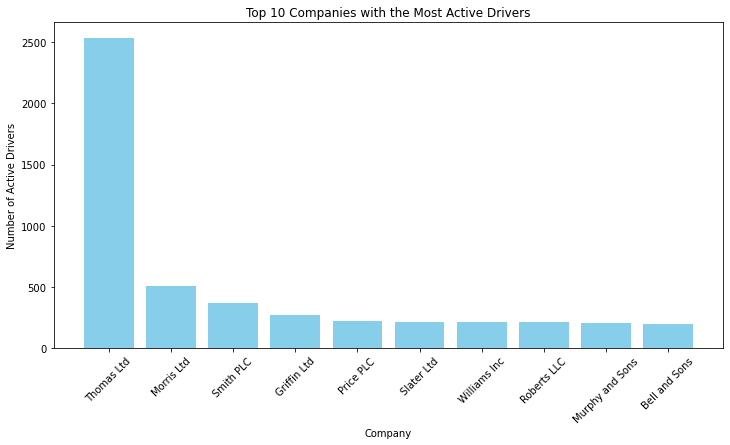

In [45]:
"""
Number of employees in each company
Get the top 10 company that has most active drivers
"""
active_driver = df[(df["disabled"]==0) & (df['deleted']==0)]
num_employees = active_driver.groupby("taxi_group_name").agg(num_drivers=('driver_full_name', 'count')).reset_index()
num_employees_sorted = num_employees.sort_values("num_drivers", ascending=False)
sorted_df = num_employees_sorted.reset_index().drop(columns='index').head(10)
print(sorted_df)
plt.figure(figsize=(12, 6))

# Bar plot for the top 10 companies
plt.bar(num_employees_sorted['taxi_group_name'].head(10), num_employees_sorted['num_drivers'].head(10), color='skyblue')
plt.xlabel('Company')
plt.ylabel('Number of Active Drivers')
plt.title('Top 10 Companies with the Most Active Drivers')
plt.xticks(rotation=45)
plt.show()

In [47]:
active_driver.head()

,taxi_group_name,driver_full_name,disabled,deleted,vehicle_brand,experience_group,awards,endurance_score,profitability_score,safety_adherence_score,efficiency_score,no_of_1_star_rating,no_of_2_star_rating,no_of_3_star_rating,no_of_4_star_rating,no_of_5_star_rating
1,"Walsh, Hammond and Craig",Carol Holmes,0,0,9,4,0,-1.177850,-1.560460,-1.211520,-0.510155,8,16,28,43,39
2,"Walsh, Hammond and Craig",Jay Bailey,0,0,16,6,0,-0.557925,0.083300,0.596134,0.257793,5,12,25,39,26
4,"Walsh, Hammond and Craig",Hayley Hall,0,0,14,1,0,0.518161,-0.108167,-0.025077,-0.133834,22,32,53,16,13
5,"Walsh, Hammond and Craig",Kerry Howard,0,0,8,6,0,0.131069,0.406218,1.494310,0.023233,3,7,10,54,48
6,"Walsh, Hammond and Craig",Max Harris,0,0,6,3,0,0.510684,1.323400,-0.183761,0.453363,18,22,48,31,23


In [48]:
import dtale

In [49]:
dtale.show(active_driver)

C:\Users\ashis\anaconda3\lib\site-packages\dtale\views.py:1929: FutureWarning:

The default value of regex will change from True to False in a future version.



Exception occurred while processing request: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Traceback (most recent call last):
  File "C:\Users\ashis\anaconda3\lib\site-packages\dtale\views.py", line 120, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\ashis\anaconda3\lib\site-packages\dtale\views.py", line 2708, in get_column_analysis
    return jsonify(**analysis.build())
  File "C:\Users\ashis\anaconda3\lib\site-packages\dtale\column_analysis.py", line 137, in build
    return_data, code = self.analysis.build(self)
  File "C:\Users\ashis\anaconda3\lib\site-packages\dtale\column_analysis.py", line 181, in build
    return_data, hist_labels = self.build_histogram_data(
  File "C:\Users\ashis\anaconda3\lib\site-packages\dtale\column_analysis.py", line 157, in build_histogram_data
    hist_data, hist_labels = np.histogram(series, **hist_kwargs)
  File "<_

2023-11-26 15:55:14,121 - ERROR    - Exception occurred while processing request: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Traceback (most recent call last):
  File "C:\Users\ashis\anaconda3\lib\site-packages\dtale\views.py", line 120, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\ashis\anaconda3\lib\site-packages\dtale\views.py", line 2708, in get_column_analysis
    return jsonify(**analysis.build())
  File "C:\Users\ashis\anaconda3\lib\site-packages\dtale\column_analysis.py", line 137, in build
    return_data, code = self.analysis.build(self)
  File "C:\Users\ashis\anaconda3\lib\site-packages\dtale\column_analysis.py", line 181, in build
    return_data, hist_labels = self.build_histogram_data(
  File "C:\Users\ashis\anaconda3\lib\site-packages\dtale\column_analysis.py", line 157, in build_histogram_data
    hist_data, hist_labels = np.histog